<h1>Summary</h1>
<p>The code implements a Multi-Layer Perceptron (MLP) model using the TensorFlow and Keras libraries to classify handwritten digits from the MNIST dataset</p>

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

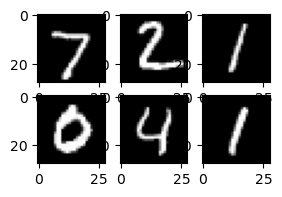

In [3]:
plt.figure(figsize=(3,3))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i],cmap='gray')

<h2>Normalizing the Data | Normalizando os dados</h2>
<p>Let's divide the training and testing values by 255, as it is the range of pixel values (0, 255)</p>

In [5]:
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
x_train[0].shape

(28, 28)

<h2>Model</h2>

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # shape of data
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

C:\Users\rafae\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

<h2>Loss and Optimizers</h2>


In [11]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']

model.compile(loss=loss,optimizer=optim,metrics=metrics)

<h2>Training the Model</h2>

In [13]:
batch_size = 64
epochs = 6

model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,shuffle=True,verbose=2)

Epoch 1/6
938/938 - 6s - 6ms/step - accuracy: 0.9169 - loss: 0.2937
Epoch 2/6
938/938 - 4s - 4ms/step - accuracy: 0.9625 - loss: 0.1316
Epoch 3/6
938/938 - 3s - 3ms/step - accuracy: 0.9728 - loss: 0.0925
Epoch 4/6
938/938 - 3s - 4ms/step - accuracy: 0.9789 - loss: 0.0698
Epoch 5/6
938/938 - 5s - 5ms/step - accuracy: 0.9834 - loss: 0.0557
Epoch 6/6
938/938 - 3s - 3ms/step - accuracy: 0.9864 - loss: 0.0444


In [14]:
model.evaluate(x_test,y_test,batch_size=batch_size,verbose=2)

157/157 - 1s - 4ms/step - accuracy: 0.9759 - loss: 0.0778


[0.07775517553091049, 0.9758999943733215]

In [19]:
probability_model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.Softmax()
])

7


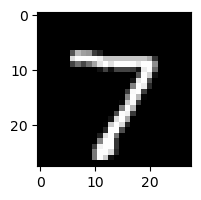

In [29]:
predicao = probability_model(x_test)
previsao = predicao[0]
print(np.argmax(previsao))
plt.figure(figsize=(2,2))
plt.imshow(x_test[0],cmap='gray')

In [33]:
previsao2 = predicao[0:20]
print(np.argmax(previsao2,axis=1))

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


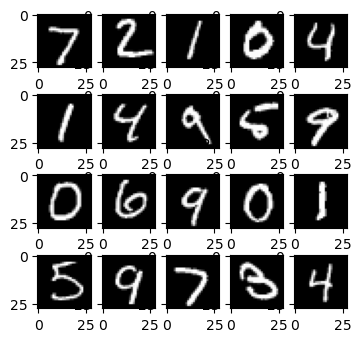

In [39]:
plt.figure(figsize=(4,4))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_test[i],cmap='gray')

<p>As we can see, the returned array matches the number represented in the images</p>